# U.S. Medical Insurance Costs

### Goal

The goal of this project is to explore the characteristics of the dataset, indentify trends in insurance costs as varied by region and customer status, and predict a new customer's insurance cost based on inputs such as gender, BMI, children status, smoker status, and region.

In [60]:
#https://medium.com/@shuv.sdr/simple-linear-regression-in-python-a0069b325bf8
#https://snarky.ca/why-you-should-use-python-m-pip/
#https://saturncloud.io/blog/how-to-plot-for-multiple-linear-regression-model-using-matplotlib/
#https://medium.com/machine-learning-with-python/multiple-linear-regression-implementation-in-python-2de9b303fc0c
#install pandas
#python3 -m pip install --upgrade pandas
#Step 1: import all libraries and open csv file
# Import libraries

# Step 1: Import libraries and open CSV and save to a list
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from pandas.core.common import random_state
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import csv

with open('insurance.csv') as insurance_file:
  insurance_file_dict = csv.DictReader(insurance_file)
  list=[]
  for row in insurance_file_dict:
    list.append(row)

   

In [55]:
df = pd.read_csv("insurance.csv")
# Customers are evenly distributed across four regions
print('Count of customers by region',df.groupby(["region"]).charges.count())
# The Northeast region is most costly 
print('Average charge by region',df.groupby(["region"]).charges.mean())
# Smokers are under represented in the data
print('Count of smokers',df.groupby(["smoker"]).charges.count())
print('Average charge by smoker status ',df.groupby(["smoker"]).charges.mean())
print('Count of child status',df.groupby(["children"]).charges.count())
print('Average charge by child status ',df.groupby(["children"]).charges.mean())
df = df.reset_index()  # make sure indexes pair with number of rows
# define the bin edges
bins = [0, 20, 30, 40, 50,60]
# bin the bmi column
df['bmi_bucket'] = pd.cut(df['bmi'], bins)
# Even we could not rely on bmi numbers solely to predict insurance costs,
#there is a strong positive correlation between bmi and insurance charges. 
print(df.groupby(["bmi_bucket"]).charges.mean())

Count of customers by region region
northeast    324
northwest    325
southeast    364
southwest    325
Name: charges, dtype: int64
Average charge by region region
northeast    13406.384516
northwest    12417.575374
southeast    14735.411438
southwest    12346.937377
Name: charges, dtype: float64
Count of smokers smoker
no     1064
yes     274
Name: charges, dtype: int64
Average charge by smoker status  smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64
Count of child status children
0    574
1    324
2    240
3    157
4     25
5     18
Name: charges, dtype: int64
Average charge by child status  children
0    12365.975602
1    12731.171832
2    15073.563734
3    15355.318367
4    13850.656311
5     8786.035247
Name: charges, dtype: float64
bmi_bucket
(0, 20]      8838.561135
(20, 30]    10849.646837
(30, 40]    15379.565215
(40, 50]    16810.194303
(50, 60]    16034.305367
Name: charges, dtype: float64


/var/folders/7r/064264hn6v188kmbchqq00380000gn/T/ipykernel_47323/1814009729.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby(["bmi_bucket"]).charges.mean())


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


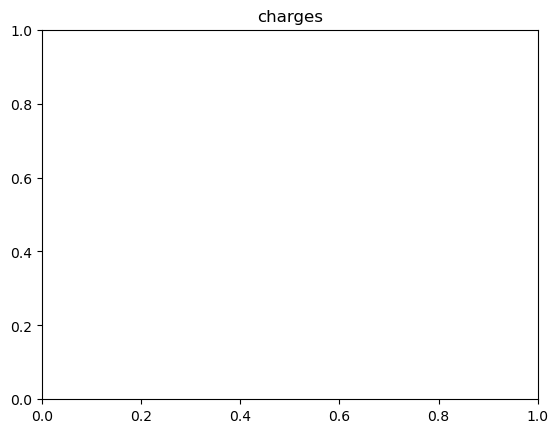

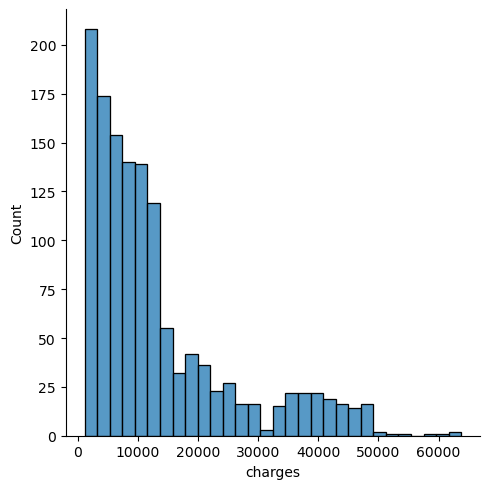

In [58]:
# Charges are right skewed
plt.title('charges')
sns.displot(df['charges'])
plt.show()

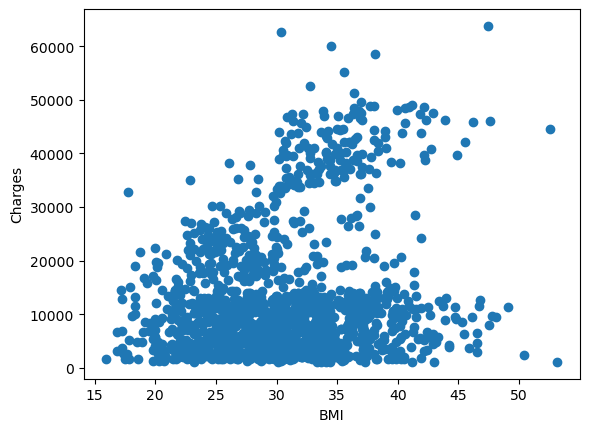

In [59]:
#some linear relationship between bmi is observed
x = df['bmi']
y = df['charges']
plt.scatter(x, y)
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()

Text(0.5, 0.92, 'Multiple Linear Regression')

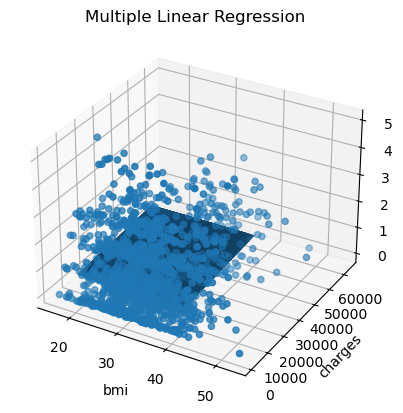

In [61]:
x = df['bmi']
y = df['charges']
z = df['children']

# Create the plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Add the data points
ax.scatter(x, y, z)

# Fit a plane using np.linalg.lstsq
A = np.vstack([x, y, np.ones_like(x)]).T
plane_coef, _, _, _ = np.linalg.lstsq(A, z, rcond=None)

# Create a meshgrid for the plane
x_plane, y_plane = np.meshgrid(x, y)
z_plane = plane_coef[0] * x_plane + plane_coef[1] * y_plane + plane_coef[2]

# Add the regression plane
ax.plot_surface(x_plane, y_plane, z_plane, alpha=0.5)

# Add labels and title
ax.set_xlabel('bmi')
ax.set_ylabel('charges')
ax.set_zlabel('children')
plt.title('Multiple Linear Regression')

In [109]:
df.loc[df['smoker'] =='yes', 'smoker_status'] =1
df.loc[df['smoker'] =='no', 'smoker_status'] = 0
# print(df.head())
x=df[['bmi','smoker_status']]
y=df['charges']

#Splitting the dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100)

#Fitting the Multiple Linear Regression model
mlr = LinearRegression()  
mlr.fit(x_train, y_train)

print("Intercept: ", mlr.intercept_)
print("Coefficients:")
# coefficients=list(zip(x, mlr.coef_))

#Prediction of test set
y_pred_mlr= mlr.predict(x_test)
#Predicted values
print("Prediction for test set: {}".format(y_pred_mlr))

mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_mlr})
print(mlr_diff.head())

Intercept:  -2316.672739486581
Coefficients:
Prediction for test set: [ 9799.70572932  7369.38562947  7420.4575736   8764.1780346
 30411.19935466 31314.64443525  9628.87888172  6751.23899538
 30455.2268927  11201.54254053 14420.83612207  9035.38766893
  9428.11330825  8457.74636984  8320.38045115 34329.65024028
  8686.68956765  8919.1549685   8426.04654245 14963.25539073
 11166.3205101   8637.37872504  5212.03626548 30210.43378119
 10599.24582014 34961.88568655 10164.2537443  34359.58896615
 30243.8947101   8221.75876594 14149.62648774  7821.98872053
 34493.43268179 32720.00344951  8214.71435985  5312.41905221
 11360.04167748 33589.9876012   6650.85620865 32082.48469868
  6770.61111212 12238.83133677  9539.06270412 10585.15700796
  6517.012493    7873.06066466  7446.87409642  9093.50401915
  7654.68407597 12406.13598133 12289.9032809   5713.95019914
  8290.44172528  6885.08271102  6594.50095995 10292.81415537
 10398.48024667 33389.22202773  8531.71263375  9306.59730326
  8457.74636984 

In [110]:
#Model Evaluation
from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr))
print('R squared: {:.2f}'.format(mlr.score(x,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

#based on the evaluation, multi-linear regression model isn't the best fitting model for this dataset.

R squared: 65.75
Mean Absolute Error: 5195.499609346548
Mean Square Error: 44862045.19595613
Root Mean Square Error: 6697.9134957056685


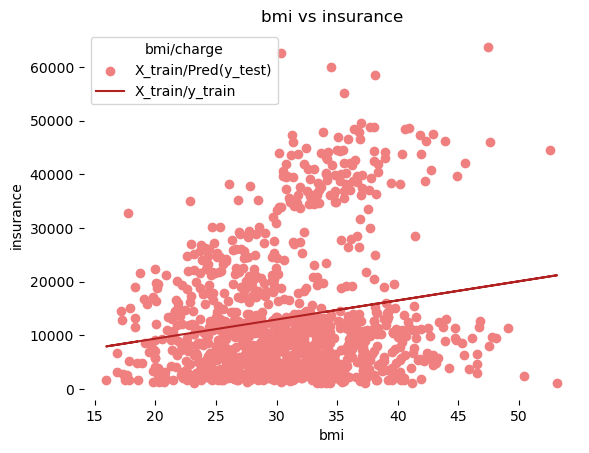

In [93]:
x=df[['bmi']] #2D array
y=df['charges']

# Splitting dataset into test/train
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
# Regressor model
regressor = LinearRegression()
regressor.fit(X_train, y_train)
# Prediction result
y_pred_test = regressor.predict(X_test)     # predicted value of y_test
y_pred_train = regressor.predict(X_train)   # predicted value of y_train

# # Prediction on training set
plt.scatter(X_train, y_train, color = 'lightcoral')
plt.plot(X_train, y_pred_train, color = 'firebrick')
plt.title('bmi vs insurance')
plt.xlabel('bmi')
plt.ylabel('insurance')
plt.legend(['X_train/Pred(y_test)', 'X_train/y_train'], title = 'bmi/charge', loc='best', facecolor='white')
plt.box(False)
plt.show()

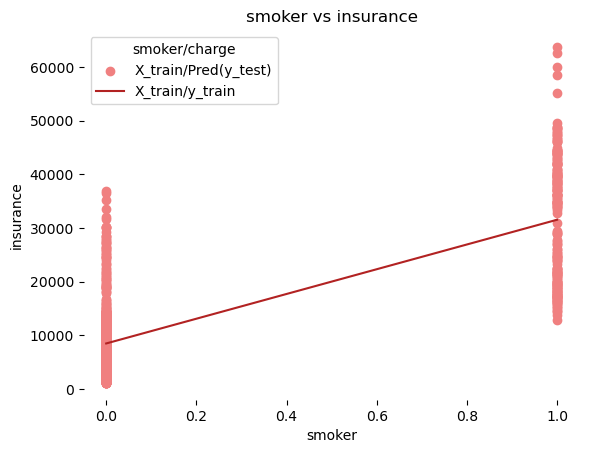

In [108]:
x=df[['smoker_status']] #2D array
y=df['charges']

# Splitting dataset into test/train
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
# Regressor model
regressor = LinearRegression()
regressor.fit(X_train, y_train)
# Prediction result
y_pred_test = regressor.predict(X_test)     # predicted value of y_test
y_pred_train = regressor.predict(X_train)   # predicted value of y_train

# # Prediction on training set
plt.scatter(X_train, y_train, color = 'lightcoral')
plt.plot(X_train, y_pred_train, color = 'firebrick')
plt.title('smoker vs insurance')
plt.xlabel('smoker')
plt.ylabel('insurance')
plt.legend(['X_train/Pred(y_test)', 'X_train/y_train'], title = 'smoker/charge', loc='best', facecolor='white')
plt.box(False)
plt.show()

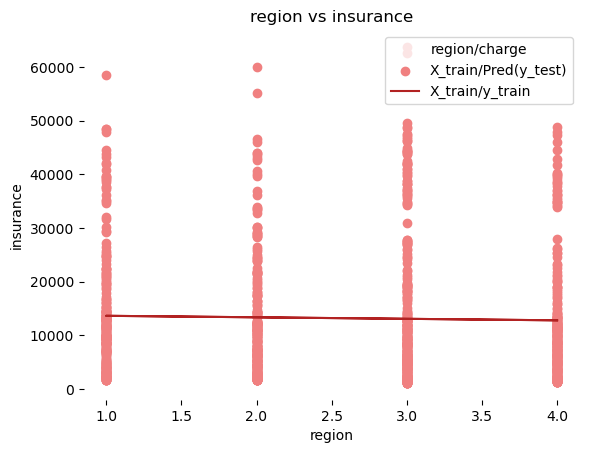

In [107]:
df.loc[df['region'] =='northeast', 'region_code'] =1
df.loc[df['region'] =='northwest', 'region_code'] = 2
df.loc[df['region'] =='southeast', 'region_code'] = 3
df.loc[df['region'] =='southwest', 'region_code'] = 4
x=df[['region_code']] #2D array
y=df['charges']

# Splitting dataset into test/train
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
# Regressor model
regressor = LinearRegression()
regressor.fit(X_train, y_train)
# Prediction result
y_pred_test = regressor.predict(X_test)     # predicted value of y_test
y_pred_train = regressor.predict(X_train)   # predicted value of y_train

# # Prediction on training set
plt.scatter(X_train, y_train, color = 'lightcoral')
plt.plot(X_train, y_pred_train, color = 'firebrick')
plt.title('region vs insurance')
plt.xlabel('region')
plt.ylabel('insurance')
plt.legend(['X_train/Pred(y_test)', 'X_train/y_train'], title = 'region/charge', loc='best', facecolor='white')
plt.box(False)
plt.show()

In [ ]:
df
x=df[['bmi']] #2D array
y=df['charges']

# Splitting dataset into test/train
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
# Regressor model
regressor = LinearRegression()
regressor.fit(X_train, y_train)
# Prediction result
y_pred_test = regressor.predict(X_test)     # predicted value of y_test
y_pred_train = regressor.predict(X_train)   # predicted value of y_train

# # Prediction on training set
plt.scatter(X_train, y_train, color = 'lightcoral')
plt.plot(X_train, y_pred_train, color = 'firebrick')
plt.title('bmi vs insurance')
plt.xlabel('bmi')
plt.ylabel('insurance')
plt.legend(['X_train/Pred(y_test)', 'X_train/y_train'], title = 'bmi/charge', loc='best', facecolor='white')
plt.box(False)
plt.show()

Smoker and BMI are the most influencing factors affecting insurance charges. BMI alone is not a sufficient indicator of a person's health and well being, the data suggests the current insurance charges seems to overly rely on this single metric. 